# Análisis de los 25 retailers más grandes de Estados Unidos

## Contexto: tu trabajo como analista de datos en retail
Imagina que acabas de iniciar tu primer trabajo como Data Analyst para una nueva empresa de retail en Estados Unidos. Managers de ventas quieren conocer ciertos aspectos de otras empresas y te piden analizar datos de otras 25 compañías muy exitosas en el país.



![image](https://static.platzi.com/media/user_upload/pexels-angela-roma-7319110-24512d80-3258-4bc6-a660-b15205ee356f.jpg)

Como dato, retail es el sector económico de empresas que se especializan en comercialización masiva de productos o servicios uniformes a grandes cantidades de clientes. Por ejemplo Walmart, Amazon, Target, Home Depot, Best Buy, etc.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/work/proyecto-datacademy/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [3]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [4]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


La compañia dominante es Walmart US, a continuación se muestra una gráfica para mostrar la diferencias entre las compañias.

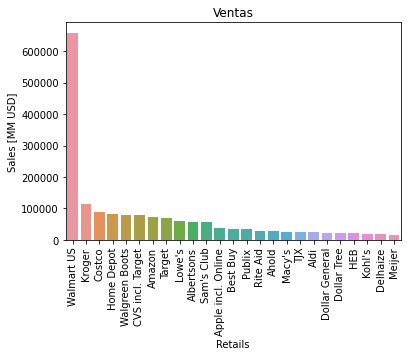

In [5]:
fig = sns.barplot(data = df_sorted, x = 'Company', y = 'Sales')
fig.set_title('Ventas')
fig.set_xlabel('Retails')
fig.set_ylabel('Sales [MM USD]')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
sns.set(rc = {'figure.figsize':(20,8)})

In [6]:
mean_sales_without_walmart = df_sorted['Sales'][1:].mean().round(2)
mean_sales_without_walmart


46602.42

El promedio de ventas de la compañías sin contar Walmart US es **46,602.42 MM USD**

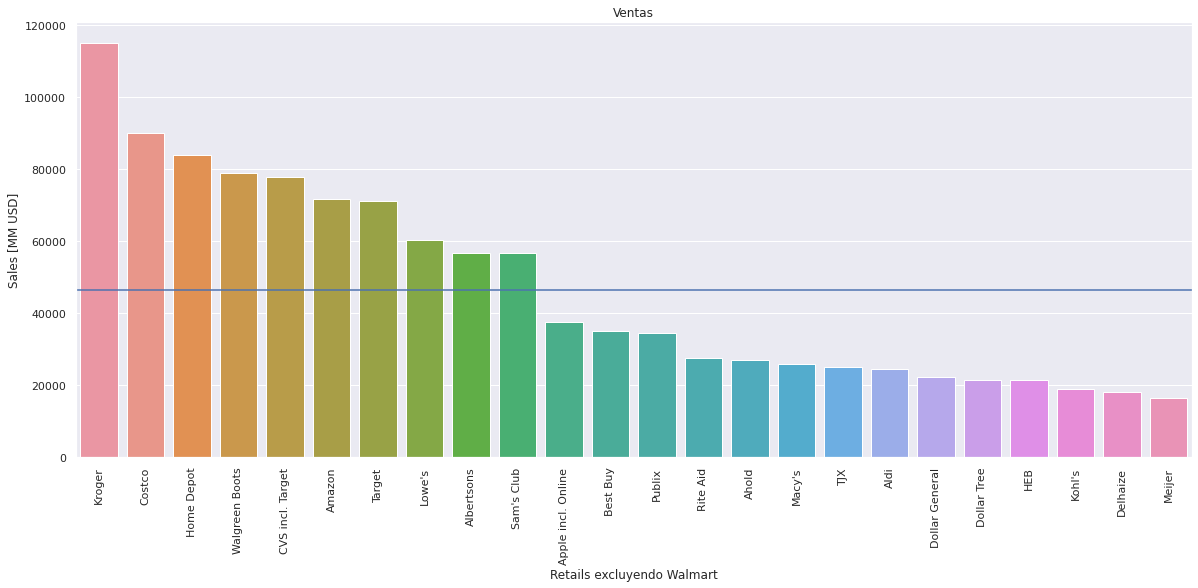

In [7]:
fig = sns.barplot(data = df_sorted[1:], x = 'Company', y = 'Sales')
fig.axhline(mean_sales_without_walmart)
fig.set_title('Ventas')
fig.set_xlabel('Retails excluyendo Walmart')
fig.set_ylabel('Sales [MM USD]')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
sns.set(rc = {'figure.figsize':(20,8)})

Hay 10 compañías sobre el promedio:
 - Kroger, Costco, Home Depot, Walgreen Boots, CSV incl. Target, Amazon, Target, Lowe's, Albertsons y Sam's Club.

Hay 14 compañías por debajo del promedio:
 - Apple incl. Online, Best Buy, Rublix, Rite Aid, Ahold, Macy's, TJX, Aldi, Dollar General, Dollar Tree, HEB, Kohl's, Delhaize y Meijer. 

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Para responder esta pregunta, aplicaremos un histograma con las compañías, pero nos surge una duda ¿Cómo determinamos la cantidad de bins?, para ello utilizaremos la regla de Sturges

$$k = [1 + log_{2}(n)]$$

In [8]:
n = df_sorted.shape[0]
k = math.floor(1 + math.log2(n))
k

5

In [9]:
sales_max = df_sorted['Sales'].max()
sales_min = df_sorted['Sales'].min()
print(sales_max, sales_min)

658119 16592


In [10]:
step = (sales_max - sales_min) / k
step

128305.4

La cantidad de bins es k=5, lo cual, cada bin es aproximadamente de 128.300 MM USD.

Text(0, 0.5, 'Frecuencia')

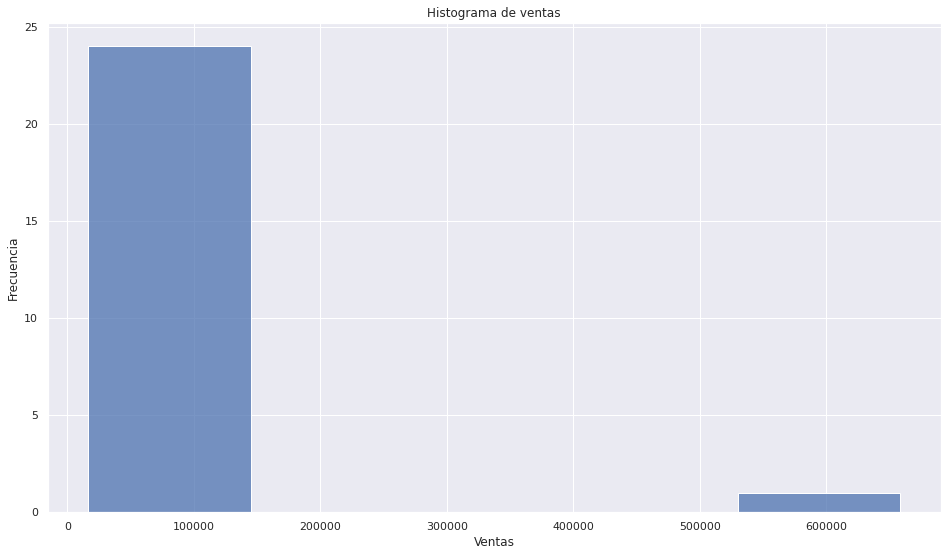

In [11]:
plt.figure(figsize = (16,9)); 
sns.histplot(data = df_sorted,x = 'Sales' ,bins = 5)
plt.title("Histograma de ventas")
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

Con esta separación, queda claro nuevamente que Walmart es la compañía dominante donde 24 de las 25 compañías, quedan en el primer segmento de 16.600 - 144.900 USD.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

Ordenaremos el Dataset por la cantidad de tiendas y las visualizamos en gráfico de barras.

In [12]:
df_stores_sorted = df.sort_values('Stores', ascending=0)

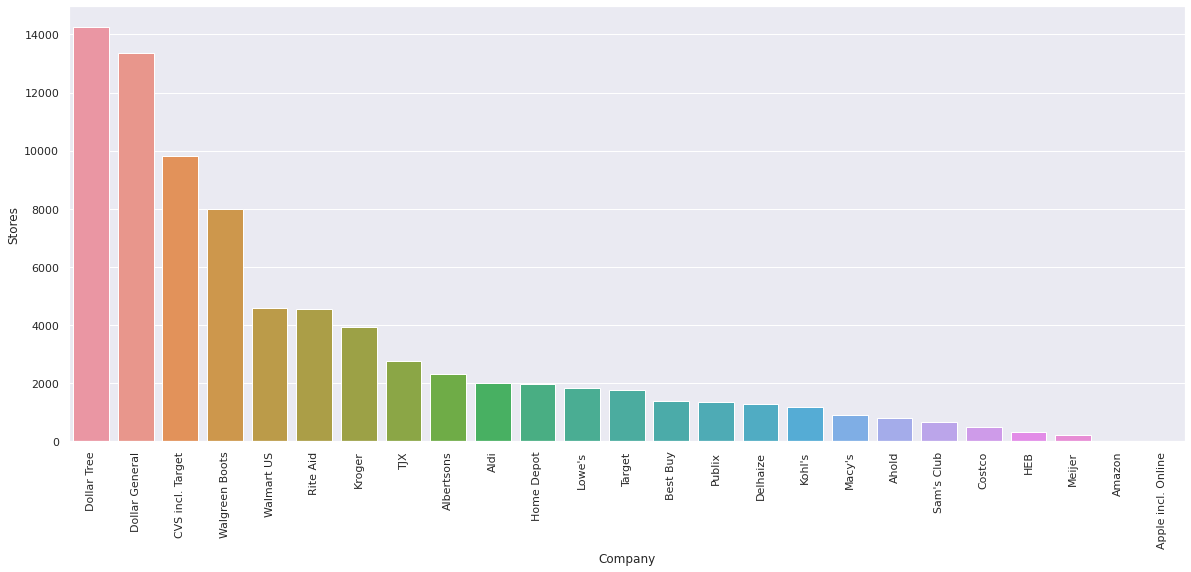

In [13]:
sns.barplot (data = df_stores_sorted, x= 'Company', y= 'Stores')
plt.xticks(rotation=90)
plt.show()

In [14]:
stores_max = df_stores_sorted['Stores'].max()
stores_min = df_stores_sorted['Stores'].min()
print(stores_max, stores_min)

14250.0 231.0


In [15]:
step = (stores_max - stores_min) / k
step

2803.8

Text(0, 0.5, 'Frecuencia')

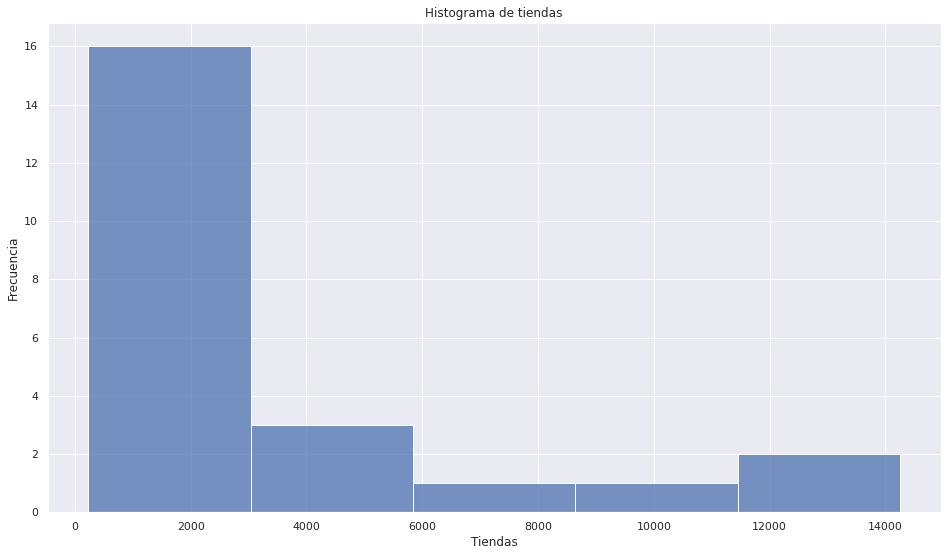

In [16]:
plt.figure(figsize = (16,9)); 
sns.histplot(data = df_stores_sorted, x = 'Stores', bins = 5)
plt.title("Histograma de tiendas")
plt.xlabel('Tiendas')
plt.ylabel('Frecuencia')

En el primer rango entre 231-3035 tiendas están las mayorías de las compañías, en total 16. 

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

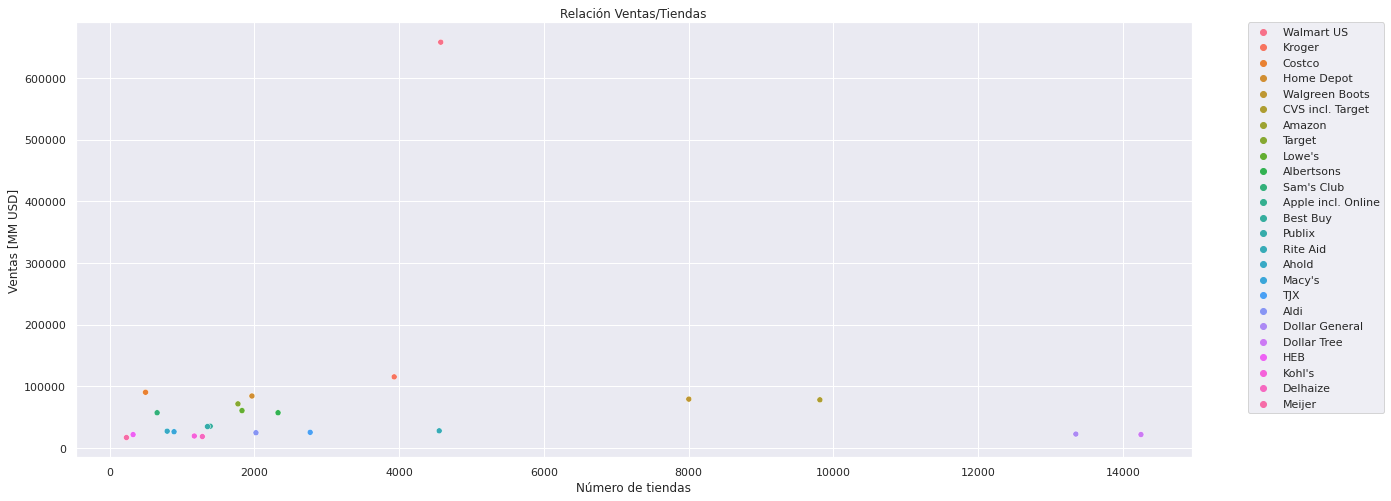

In [17]:
sns.scatterplot(data=df_sorted,x='Stores',y='Sales',hue='Company')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Número de tiendas')
plt.ylabel('Ventas [MM USD]')
plt.title('Relación Ventas/Tiendas')
plt.show()

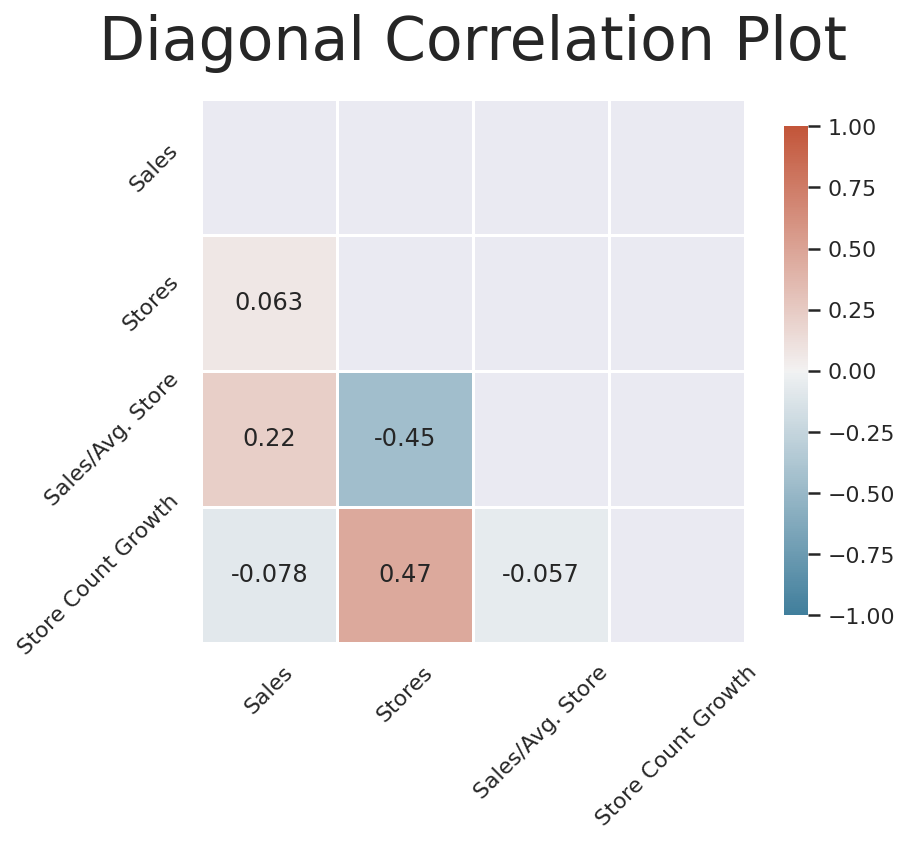

In [18]:
sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'
# Compute the correlation matrix
corr = df.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 5))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1.5,                              # Set linewidth between squares
            cbar_kws = {"shrink": .9},                     # Set size of color bar
            annot = True                                   # Include values within squares
           );

plt.xticks(rotation=45)                                    # Rotate x labels
plt.yticks(rotation=45)                                    # Rotate y labels
# plt.xlabel('X Axis Title', size=20)                      # Set x axis title
# plt.ylabel('Y Axis Title', size=20)                      # Set y axis title
plt.title('Diagonal Correlation Plot', size=30, y=1.05);   # Set plot title and position

No hay relación entre el número de tiendas y las ventas, el coeficiente de correlación entre ambas variables es de **0.063**.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [19]:
rango = df['Sales'].max()- df['Sales'].min()
rango

641527

El rango que existe entre Walmart US (compañia con más ventas) con Meijer (compañía con menos ventas) es de **641,527 MM USD**

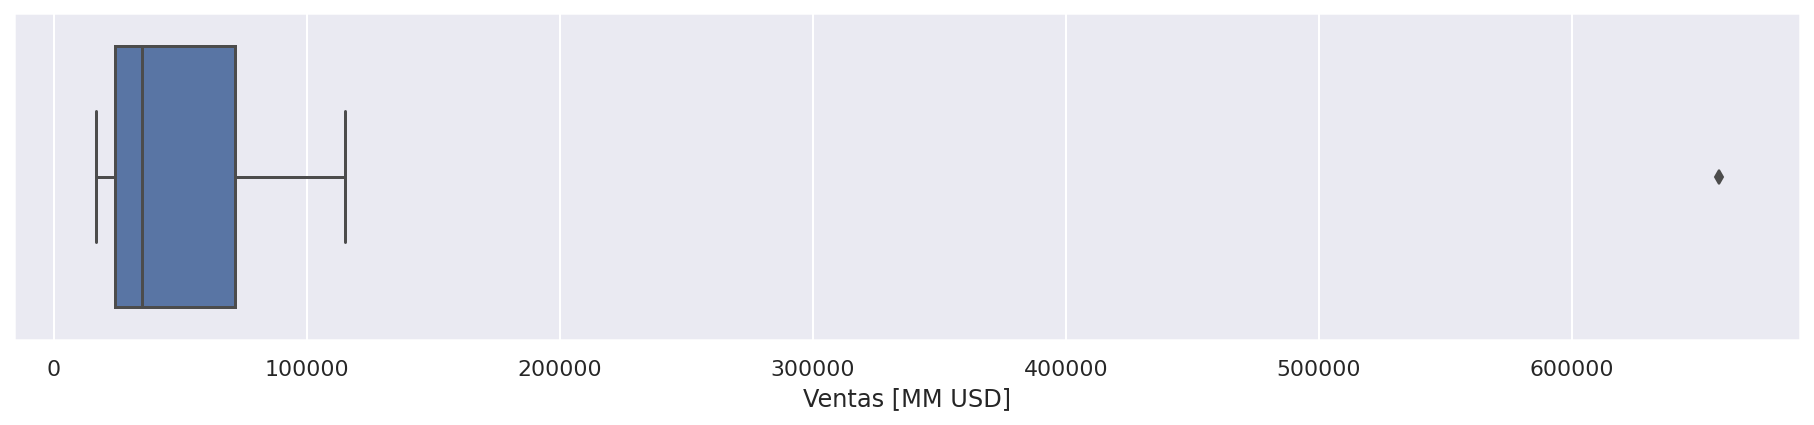

In [20]:
plt.figure(figsize=(16,3)); 
ax = sns.boxplot(x=df['Sales'])
ax.set_xlabel('Ventas [MM USD]')
plt.show()

El rango en está ocación no representa una medida de dispersión confiable porque Walmart es claramente un outlier como se muestra en el diagrama de caja.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

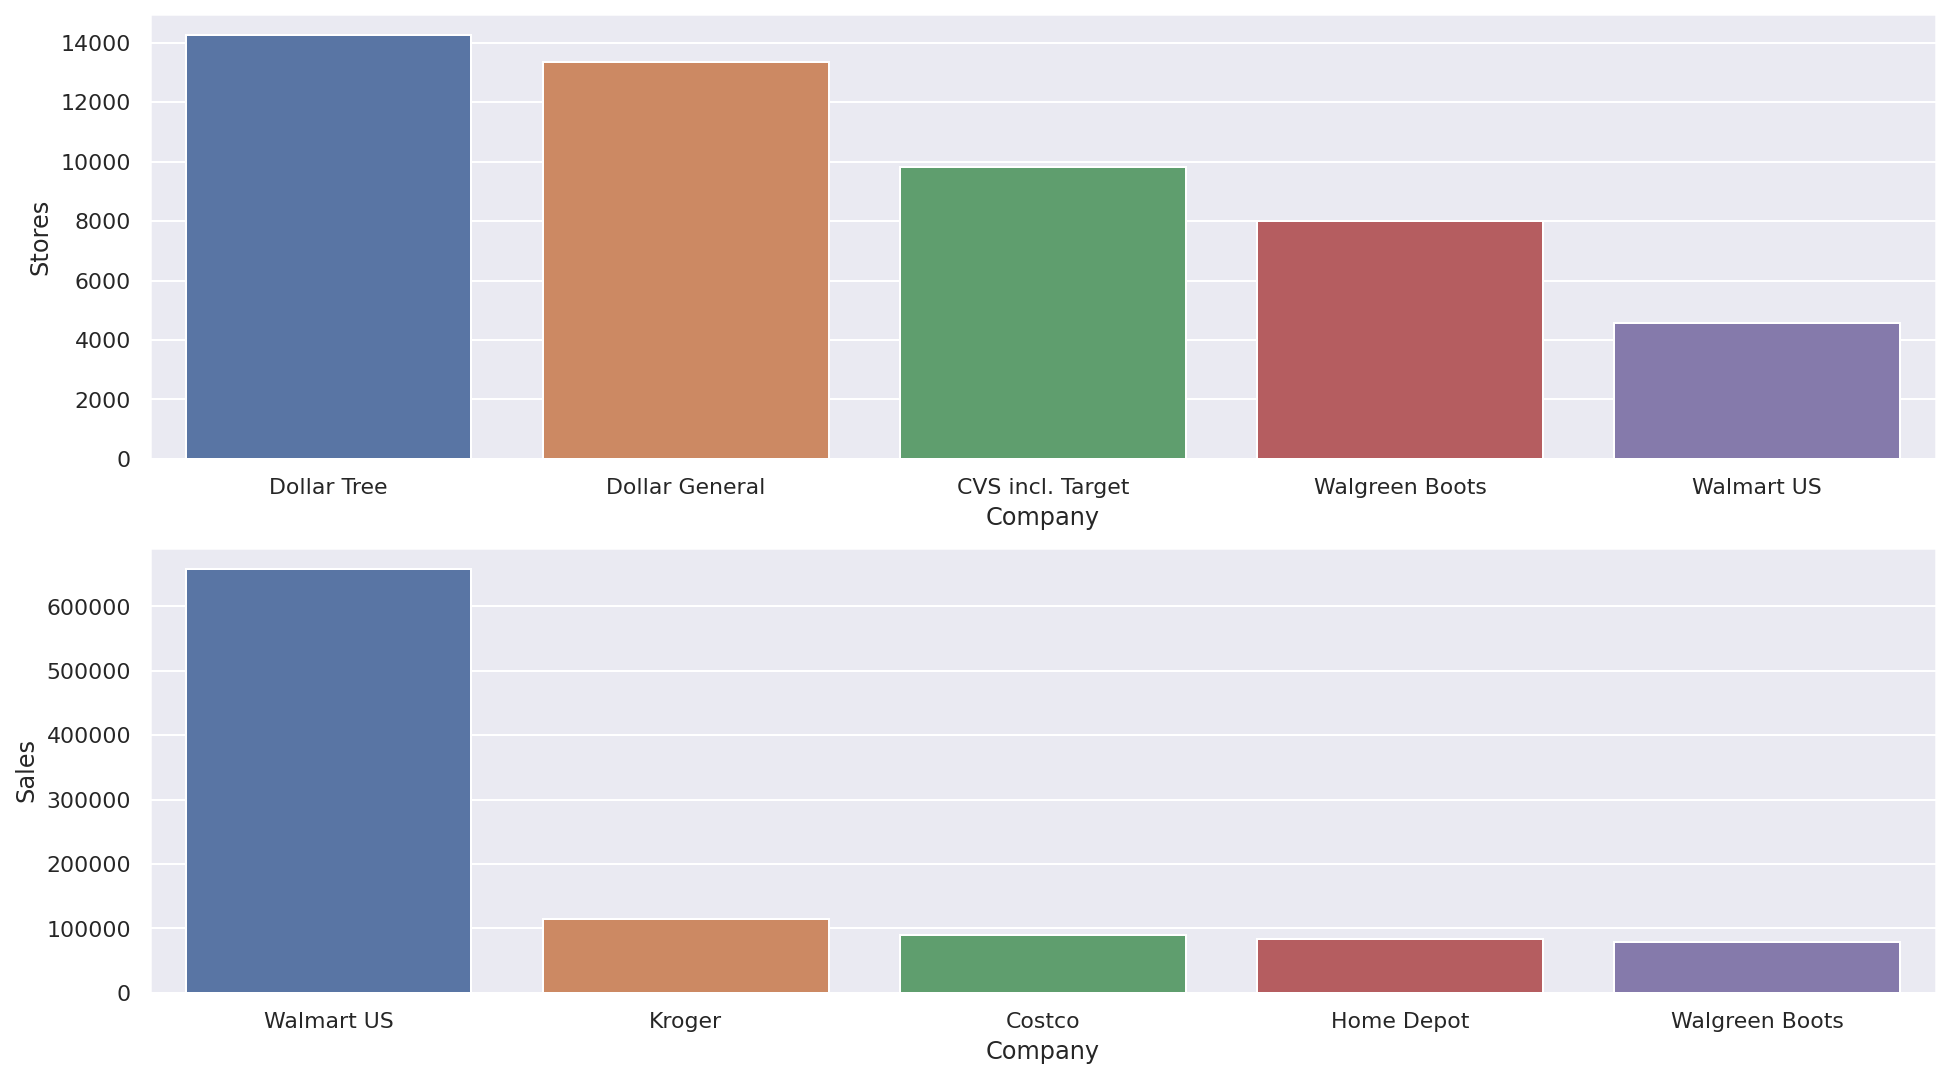

In [21]:
fig, (ax,bx) = plt.subplots(2,1, figsize=(16,9))
sns.barplot(data = df_stores_sorted[:5], x= 'Company', y='Stores',ax = ax)
sns.barplot(data = df_sorted[:5], x= 'Company', y='Sales',ax = bx)
plt.show()

Solo Walmart US y Walgreen Boots están dentro de las que más ventas y tiendas tienen.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [22]:
df_category = df.groupby(['Category']).agg({'Sales' : 'sum'})
df_category = df_category.sort_values('Sales', ascending=0)
df_category = df_category.reset_index()
df_category


,Category,Sales
0,Supercenters,745919
1,Grocery,297164
2,Drug Stores,184202
3,Home Improvement,144287
4,Warehouse Club,90048
5,Electronic/Mail Order,71687
6,Warehouse Clubs,56828
7,Department Stores,45088
8,Dollar Stores,43698
9,Electronics,34980


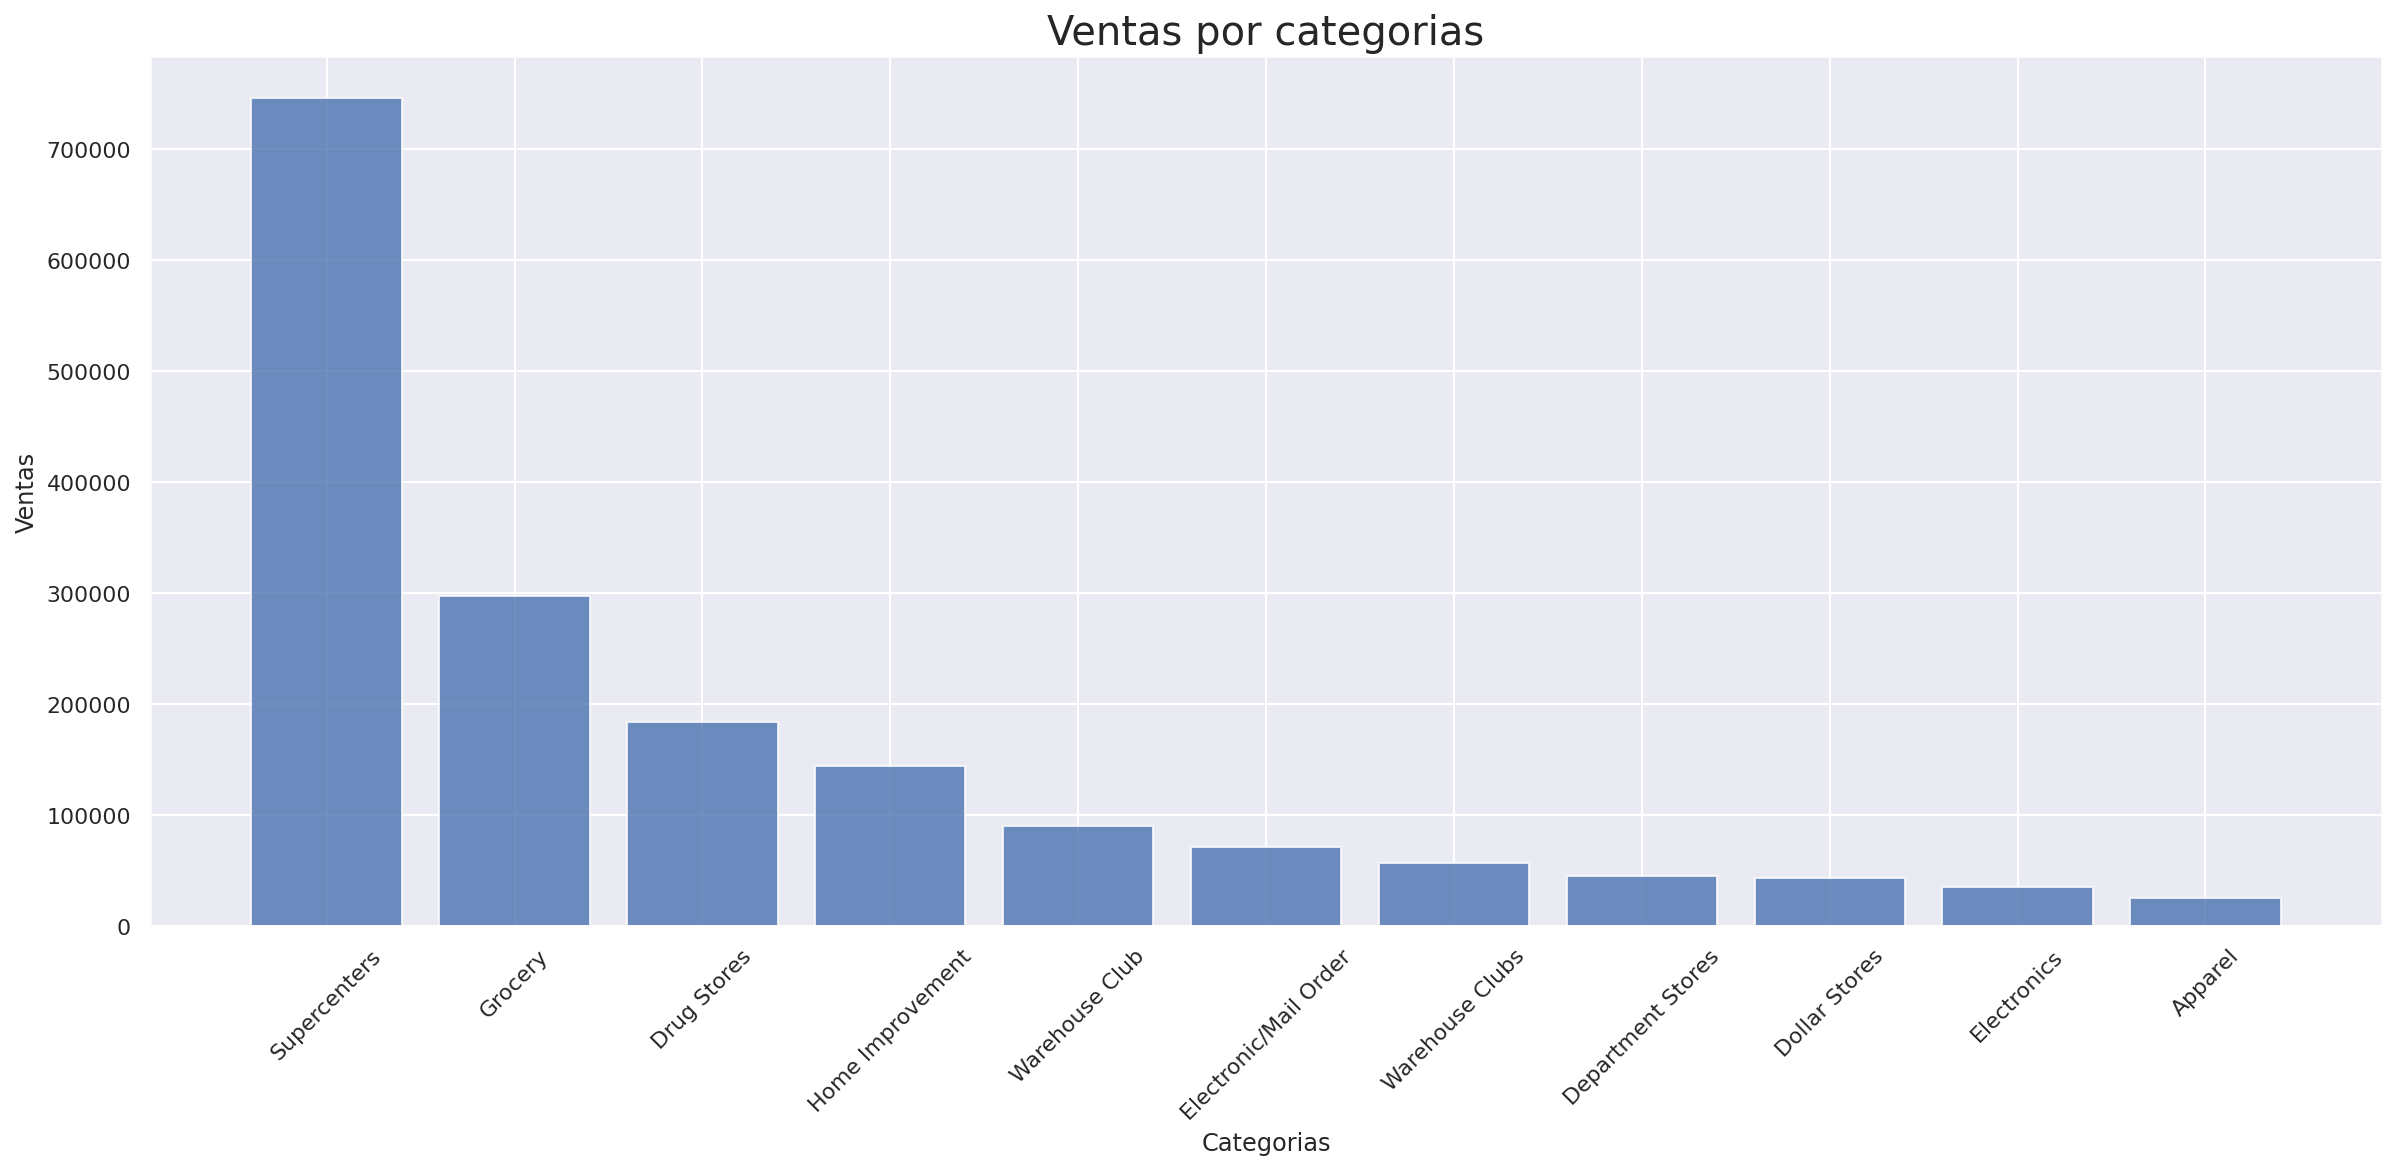

In [23]:
plt.bar(df_category['Category'], df_category['Sales'], alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel('Categorias')
plt.ylabel('Ventas')
plt.title('Ventas por categorias', fontsize=20)
sns.set(rc = {'figure.figsize':(15,9)})
plt.show()

Por lejos la categoría que más vende es Supercenters, y es de esperar pues Walmart US corresponde a esta categoría.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [24]:
df['Sales/Stores'] = df['Sales'] / df['Stores']
df_sales_per_stores = df.sort_values('Sales/Stores', ascending=False).reset_index()
df_sales_per_stores

,index,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
0,2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
1,0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
2,10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
3,24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840
4,21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334
5,3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
6,7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
7,15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872
8,8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
9,16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840


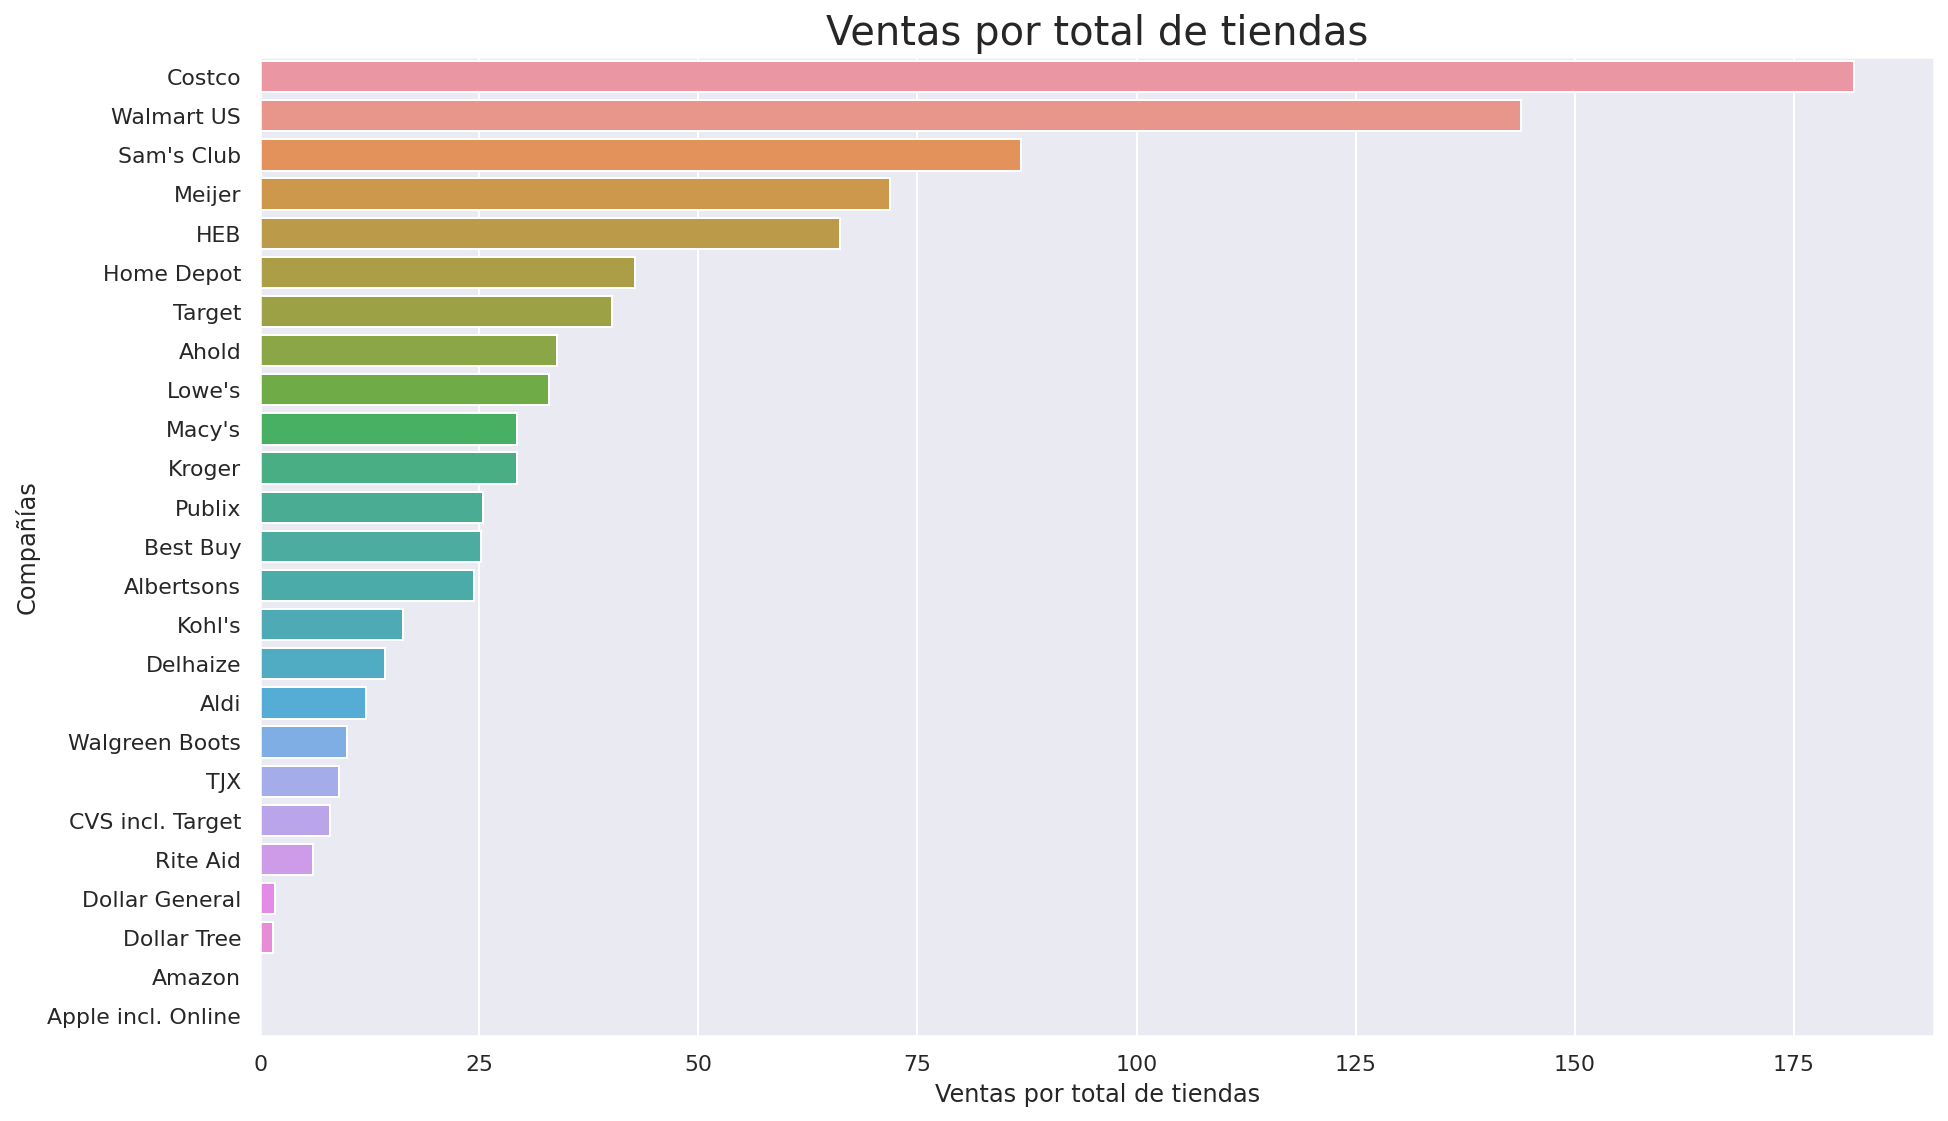

In [25]:
sns.barplot(x = 'Sales/Stores', y = 'Company', data= df_sales_per_stores )
plt.xlabel('Ventas por total de tiendas')
plt.ylabel('Compañías')
plt.title('Ventas por total de tiendas', fontsize=20)
sns.set(rc = {'figure.figsize':(15,9)})
plt.show()

La compañía que en promedio más vende por tienda es Costco, sacando **181.91 MM USD** por cada una de ellas

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [26]:
df_company_online = df[df['Stores'].isna()]
df_company_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN


In [27]:
df_sorted['online'] = df_sorted['Stores'].isna()

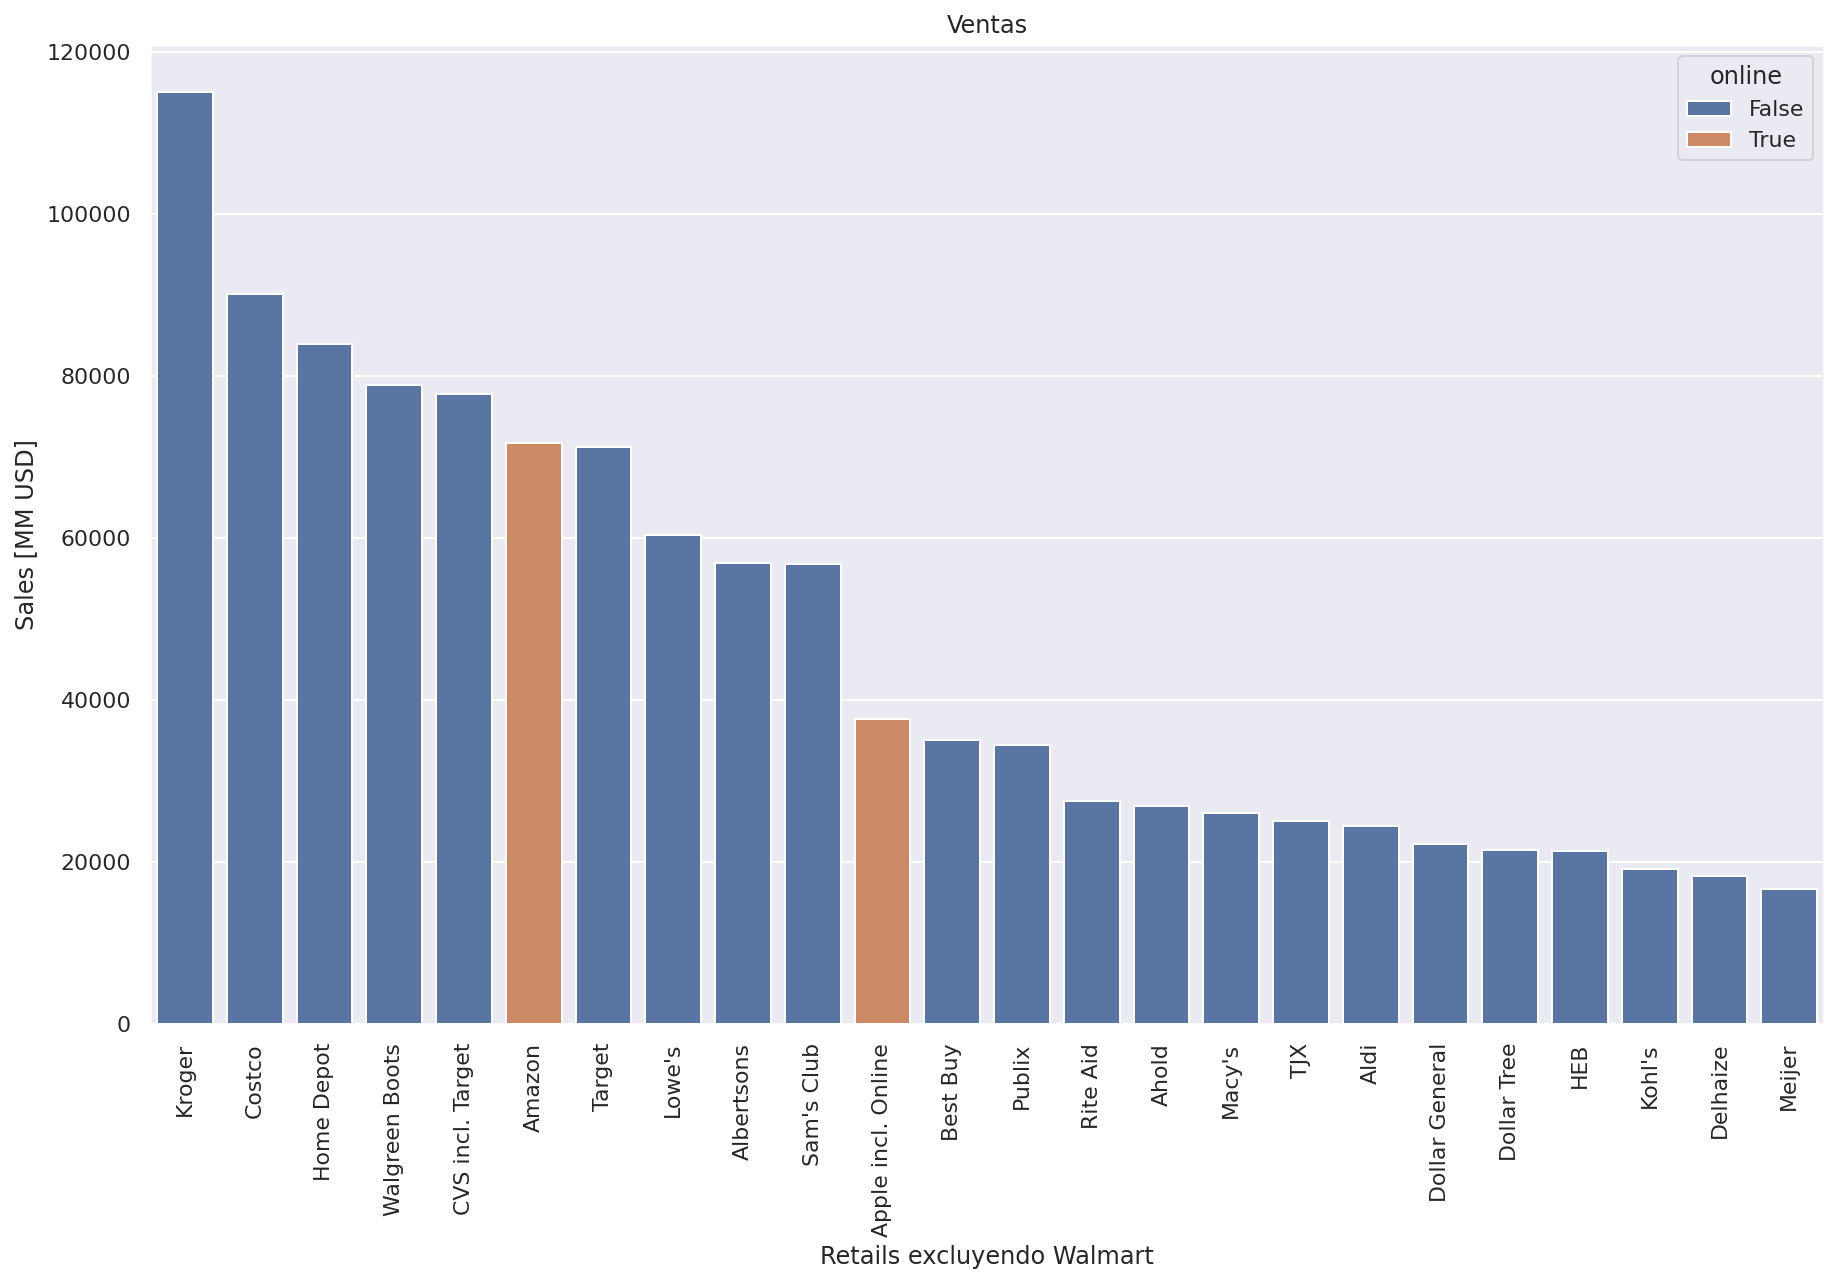

In [28]:
fig = sns.barplot(data = df_sorted[1:], x = 'Company', y = 'Sales', hue='online', dodge=False)
fig.set_title('Ventas')
fig.set_xlabel('Retails excluyendo Walmart')
fig.set_ylabel('Sales [MM USD]')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
sns.set(rc = {'figure.figsize':(20,8)})

Amazon y Apple incl. Online son las dos compañías solo con tiendas online. Amazon tiene ventas de alrededor 70000 MM USD, con ventas muy parecidas a compañías como CVS incl. Target y Target, siendo la séptima compañía con más ventas (contemplando a nuestro outlier Walmart US). Por otro lado Apple incl. Online tiene ventas de alrededor de 40000 MM USD, sus ventas son parecidas a Best Buy y Publix, siendo la doceava compañía en orden de ventas.

## III. Tus propias preguntas

### 10. ¿Qué compañia tiene la mayor tasa de crecimiento?

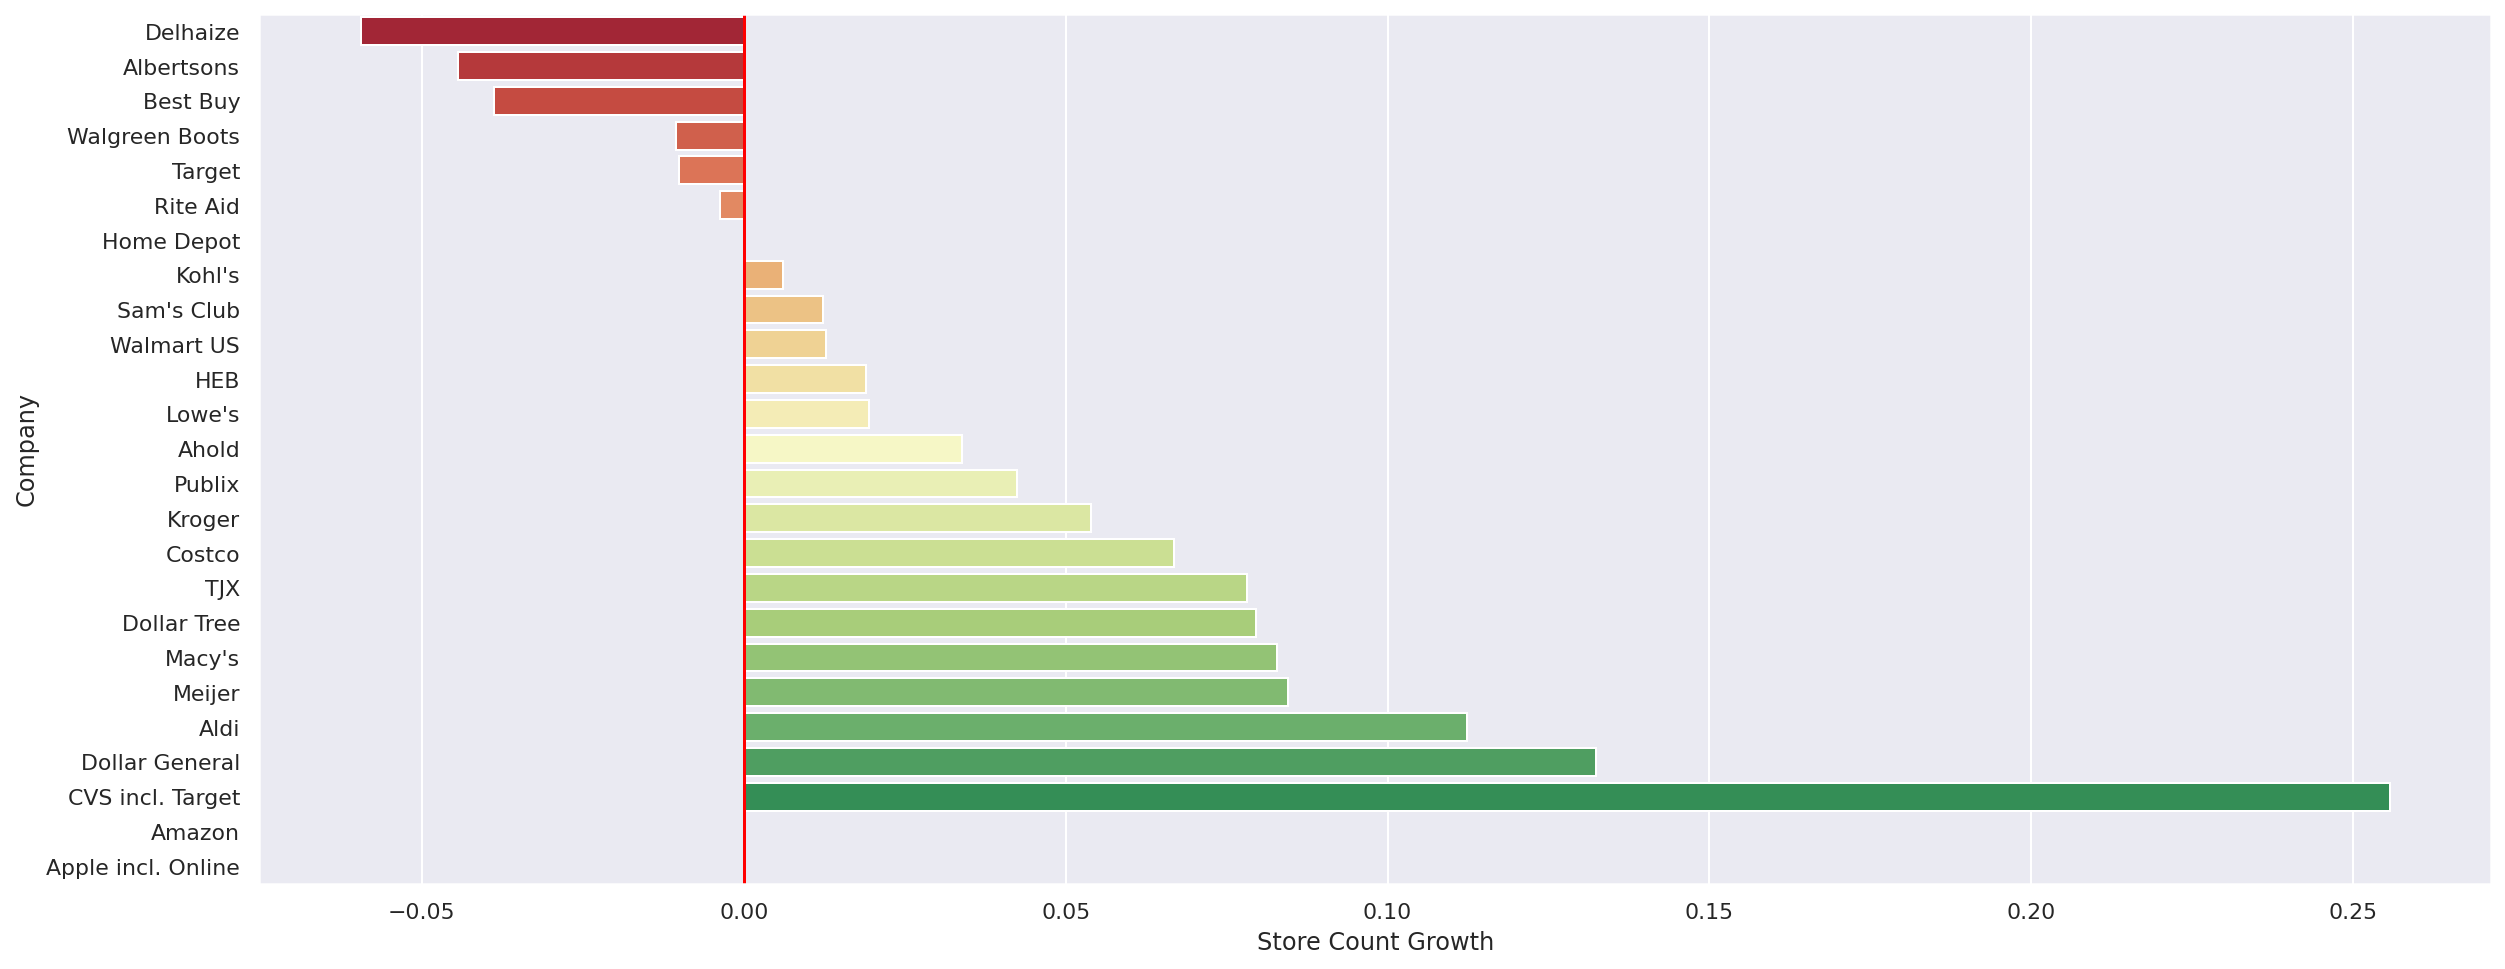

In [29]:
df_growth = df.sort_values('Store Count Growth', ascending=1)
fig = sns.barplot(x='Store Count Growth', y= 'Company', data=df_growth, palette='RdYlGn')
fig.axvline(0.0, color='red')
plt.show()

In [30]:
df_growth

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery,14.219531
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics,25.183585
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores,6.036899
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores,16.304534
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597


La compañía con mayor crecimiento es CVS incl. Target con **0.2557**. Hay 6 compañías con decrecimiento: Rite Aid, Target, Walgreen Boots, Best Buy, Albertsons y Delhaize.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1a203d8-61a0-469e-b175-164429fc9b5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>